# Quality Control of RNA-Seq Data from Olympia Oysters
Following along with [this tutorial](https://informatics.fas.harvard.edu/best-practices-for-de-novo-transcriptome-assembly-with-trinity.html). Data was received on Dec. 4 and consists of 8 samples sequenced on 1 PE 100bp Illumina HiSeq 4000 lane at the UChicago Functional Genomics Core. Each sample contains 4-8 pooled individuals from across 4 populations and represents a specific tissue at a specific treatment.

In [1]:
%pwd

u'/home/t.cri.ksilliman/OA_RNA'

Rename files so the two lanes are kept separate

In [2]:
%%bash
for i in /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/0343/FastQ/*.gz;
    do mv $i ${i/001/0343};
done;

for i in /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/0348/FastQ/*.gz;
    do mv $i ${i/001/0348};
done;

In [3]:
%%sh
mv /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/0343/FastQ/* /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/
mv /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/0348/FastQ/* /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/


### FastQC (using [MultiQC](http://multiqc.info/))

In [4]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5
fastqc --extract /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/*fastq.gz -o /scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/ -t 10

Analysis complete for CP-17_S9_L004_R1_0348.fastq.gz
Analysis complete for CP-16_S8_L004_R1_0348.fastq.gz
Analysis complete for CP-16_S8_L004_R2_0348.fastq.gz
Analysis complete for CP-15_S7_L004_R2_0348.fastq.gz
Analysis complete for CP-15_S7_L004_R1_0348.fastq.gz
Analysis complete for CP-15_S7_L004_R1_0343.fastq.gz
Analysis complete for CP-16_S8_L004_R1_0343.fastq.gz
Analysis complete for CP-16_S8_L004_R2_0343.fastq.gz
Analysis complete for CP-15_S7_L004_R2_0343.fastq.gz
Analysis complete for CP-17_S9_L004_R1_0343.fastq.gz
Analysis complete for CP-1_S1_L004_R1_0348.fastq.gz
Analysis complete for CP-1_S1_L004_R2_0348.fastq.gz
Analysis complete for CP-18_S10_L004_R1_0348.fastq.gz
Analysis complete for CP-17_S9_L004_R2_0348.fastq.gz
Analysis complete for CP-18_S10_L004_R2_0348.fastq.gz
Analysis complete for CP-17_S9_L004_R2_0343.fastq.gz
Analysis complete for CP-18_S10_L004_R1_0343.fastq.gz
Analysis complete for CP-18_S10_L004_R2_0343.fastq.gz
Analysis complete for CP-1_S1_L004_R1_0343.f

Started analysis of CP-15_S7_L004_R1_0343.fastq.gz
Started analysis of CP-15_S7_L004_R1_0348.fastq.gz
Started analysis of CP-15_S7_L004_R2_0343.fastq.gz
Started analysis of CP-15_S7_L004_R2_0348.fastq.gz
Started analysis of CP-16_S8_L004_R1_0343.fastq.gz
Started analysis of CP-16_S8_L004_R1_0348.fastq.gz
Started analysis of CP-16_S8_L004_R2_0343.fastq.gz
Started analysis of CP-16_S8_L004_R2_0348.fastq.gz
Started analysis of CP-17_S9_L004_R1_0343.fastq.gz
Started analysis of CP-17_S9_L004_R1_0348.fastq.gz
Approx 5% complete for CP-15_S7_L004_R1_0348.fastq.gz
Approx 5% complete for CP-15_S7_L004_R1_0343.fastq.gz
Approx 5% complete for CP-16_S8_L004_R1_0348.fastq.gz
Approx 5% complete for CP-15_S7_L004_R2_0348.fastq.gz
Approx 5% complete for CP-16_S8_L004_R1_0343.fastq.gz
Approx 5% complete for CP-15_S7_L004_R2_0343.fastq.gz
Approx 5% complete for CP-16_S8_L004_R2_0348.fastq.gz
Approx 5% complete for CP-17_S9_L004_R1_0348.fastq.gz
Approx 5% complete for CP-16_S8_L004_R2_0343.fastq.gz
Appr

In [5]:
%%sh
multiqc /scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/ -o /scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/

Searching 960 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/'
[INFO   ]          fastqc : Found 48 reports
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : ../../../scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/multiqc_report.html
[INFO   ]         multiqc : Data        : ../../../scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/multiqc_data
[INFO   ]         multiqc : MultiQC complete



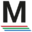
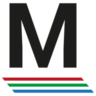
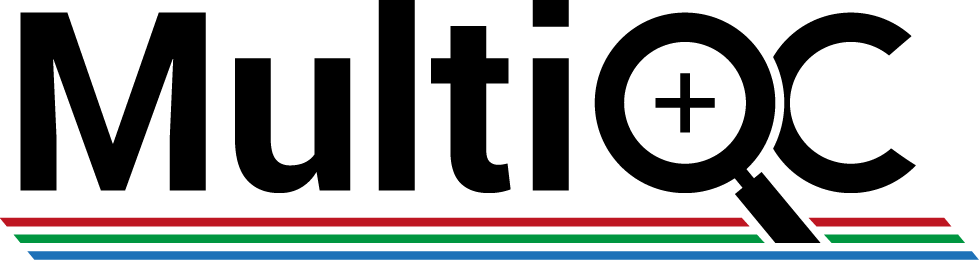
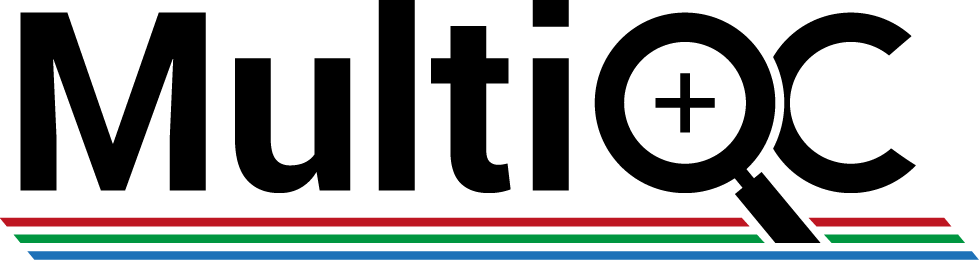
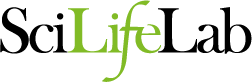

In [6]:
from IPython.core.display import display, HTML
display(HTML('/scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/multiqc_report.html'))

### Remove erroneour k-mers from sequencing reads using [Rcorrector](https://github.com/mourisl/Rcorrector)

In [ ]:
%%bash
module load gcc/6.2.0
module load jellyfish/2.2.3
module load zlib/1.2.8

cd /scratch/t.cri.ksilliman/OA_RNA/
#Tried to run all at once, but kept running out of memory
#R1=`ls -m /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/*R1*.fastq.gz | tr -d '\n'`
#R2=`ls -m /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/*R2*.fastq.gz | tr -d '\n'`
for i in /scratch/t.cri.ksilliman/OA_RNA/Oyster/Oyster_Raw_RNASeq/*R1*.fastq.gz;
    do perl ~/Downloads/rcorrector/run_rcorrector.pl -t 8 -1 $i -2 ${i/R1/R2} -od /scratch/t.cri.ksilliman/OA_RNA/Oyster/QC_Output/;
done;